In [1]:
# Importing packages
from ipynb.fs.full.my_functions import *

In [2]:
# Call function for variables
(a) = variables_decl()  # variable 'a' represents the seconds that is considered a delay (300s = 5 min.)

In [3]:
# Call function to retrieve month and year variables from user
(month, year) = period()

Enter month (1 or 2 digits):  1
Enter year (4 digits):  2021


In [4]:
# Call function for database import (dataframes)
(df, df_sb) = db_import()

In [5]:
# Call function for formatting dataframes - have to add those columns in the actual script, otherwise it gives problems with the accents
df_sb.columns=['NAME'] 
for i in range(0,len(df_sb['NAME']),1):
    df_sb['SECTION_DEBUT'] = "Section Début: " + df_sb.loc[:,'NAME'] + " "
    df_sb['CANTON'] = "Canton: " + df_sb.loc[:,'NAME'] + " "
    df_sb['SECTION_TETE'] = "Section da Tête: " + df_sb.loc[:,'NAME'] + " "
(df, df_sb) = df_format(df, df_sb)

In [6]:
# Call function for splitting dataframes and dropping original dataframe
(df, df_sent, df_received) = df_split(df)

In [7]:
# Call function for dataframe filtering (part I)
(df_sent, df_received) = filter_I(df_sent, df_received, month, year)

In [8]:
# Call function to get total number of sent messages, received messages and total messages (sent+received)
(totalSentMessages, totalReceivedMessages, totalMessages) = count_messages(df_sent, df_received)

In [9]:
# Call function to return the average delivery of all sent and received messages
(averageSentDelivery, averageReceivedDelivery, averageTotalDelivery) = average_delivery(df_sent,df_received, totalSentMessages, totalReceivedMessages)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


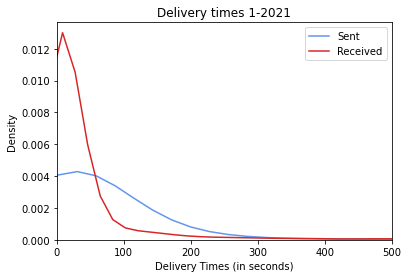

In [10]:
# Call function to create a density graph for sent and received messages
dens_graph(df_sent, df_received, month, year)

In [11]:
# Call function to calculate % and total amount of messages that took more than 5min
(percentageSentDelay, totalSentDelay, percentageReceivedDelay, totalReceivedDelay, percentageTotalDelay, totalDelay) = calc_delay(df_sent, df_received, totalSentMessages, totalReceivedMessages, a)

In [12]:
# Call function to prepare dataframe df_sent and df_received for time series
(df_sent, df_received, ts_sent, ts_received) = ts_prep(df_sent, df_received)

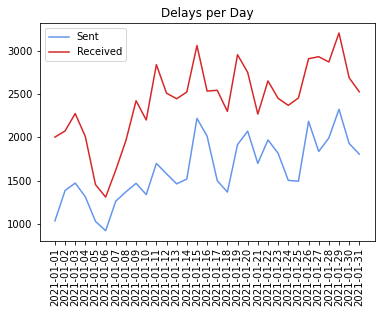

In [13]:
# Call function to create time series graph for sent and receives messages
ts_graph(ts_sent, ts_received, month, year)

In [14]:
# Call function for dataframe filtering (part II)
(df_sent, df_received) = filter_II(df_sent, df_received, a)

In [15]:
# Call function to get total number of sent messages and received messages
(totalSentMessageDelay, totalReceivedMessageDelay, no_use_variable) = count_messages(df_sent, df_received) 
del no_use_variable # deleting the variable with no use - The function is also used in other parts of codes and returns 3 results. For this block only 2 are needed.

In [16]:
# Call function to return the average delivery of all sent and received messages
(averageSentDeliveryDelay, averageReceivedDeliveryDelay, averageDeliveryDelay) = average_delivery(df_sent,df_received, totalSentMessageDelay, totalReceivedMessageDelay)

In [17]:
# Call function to return the number of delays per SB and average delivery times per SB
(df_sb,totalReceivedMessageDelay) = sb_calc(df_sb, df_sent, df_received, totalSentMessageDelay, totalReceivedMessageDelay)

In [18]:
# Call function to calculate the average delay per SB
(df_sb) = aver_delay_sb(df_sb)

In [19]:
# Call function to calculate the % of delays per SB
(df_sb) = perc_sb(df_sb, totalSentMessageDelay, totalReceivedMessageDelay)

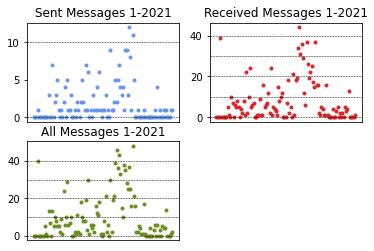

In [20]:
# Call function to create a disperity graph for sent, received and total messages
disp_all_graph(df_sb, month, year)

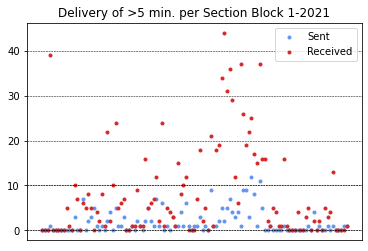

In [21]:
# Call function to create a disperity graph for sent and received combined
disp_sent_received_graph(df_sb, month, year)

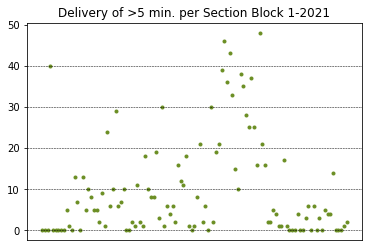

In [22]:
# Call function to create a disperity graph for total messages
disp_total_graph(df_sb, month, year)

In [23]:
# Call function for creating variables to prepare the TOP 10 SB horizontal barplots
(top10_Sent, top10_Received, top10_Total) = order_barplot(df_sb)

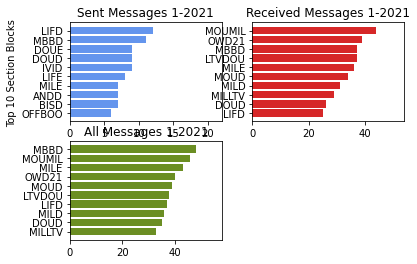

In [24]:
# Call function for creating horizontal barplot of sent, received and total SBs combined
barplot_all(df_sb, top10_Sent, top10_Received, top10_Total, month, year)

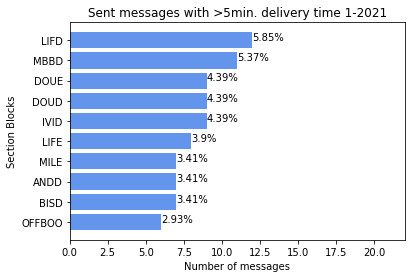

In [25]:
# Call function for creating horizontal barplot of sent SBs
barplot_sent(df_sb, top10_Sent, month, year)

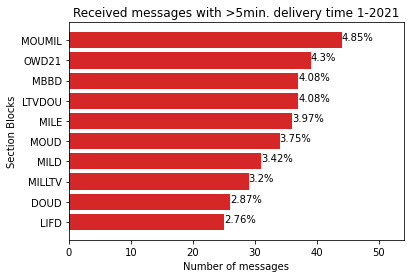

In [26]:
# Call function for creating horizontal barplot of received SBs
barplot_received(df_sb, top10_Received, month, year)

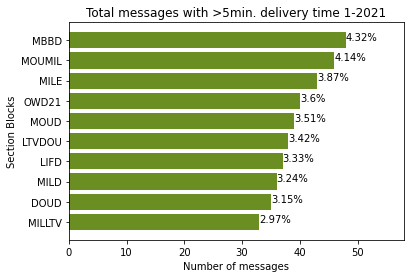

In [27]:
# Call function for creating horizontal barplot of total SBs (sent + received)
barplot_total(df_sb, top10_Total, month, year)

In [28]:
# Call function to prepare images for database insertion
(density, dispersion_all, dispersion_sent_received, dispersion_total, bar_all, bar_sent, bar_received, bar_total, month, year) = var_prep(month, year)

In [ ]:
# Call function for database insertion
db_insert(month, year, density, dispersion_all, dispersion_sent_received, dispersion_total, bar_all, bar_sent, bar_received, bar_total, totalSentMessages, averageSentDelivery, percentageSentDelay, totalSentDelay, totalSentMessageDelay, averageSentDeliveryDelay, totalReceivedMessages, averageReceivedDelivery, percentageReceivedDelay, totalReceivedDelay, totalReceivedMessageDelay, averageReceivedDeliveryDelay,totalMessages, averageTotalDelivery, percentageTotalDelay, totalDelay, averageDeliveryDelay, df_sb)